In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')
# plt.figure(figsize = (10,10)), plt.axis('off')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
# cv2_imshow(img)
#reading in plt.imread gives r,g,b values in float32. plotting using cv2_imshow takes 4s and plt.imshow takes 0.03s
img*=255
img = img.astype(int)
print(img.dtype)

int64


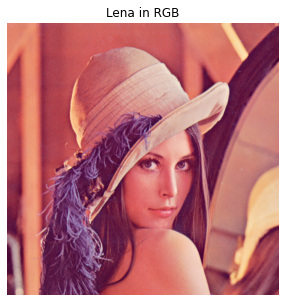

In [ ]:
plt.figure(figsize=(5,5)),plt.axis('off'),plt.title('Lena in RGB')
plt.imshow(img)

In [ ]:
r,g,b = cv2.split(img)
print(r.max())

255


In [ ]:
r = r/255
g = g/255
b = b/255
print(r.max())

1.0


In [ ]:
hue = []
sat = []
val = []
for i,j,k in zip(r,g,b):
  for x,y,z in zip(i,j,k):
    cmax = max(x,y,z)
    cmin = min(x,y,z)
    df = cmax-cmin
    if cmax == x:
      h = (((y-z)/df)%6)*60
    elif cmax == y:
      h = (((z-x)/df)+2)*60
    elif cmax == z:
      h = (((x-y)/df)+4)*60
    elif cmax == cmin:
      h == 0
    if cmax == 0:
      s = 0
    else:
      s = df/cmax
    v = cmax
    hue.append(h)
    sat.append(s)
    val.append(v)

In [ ]:
hue = np.reshape(hue,(512,512))
sat = np.reshape(sat,(512,512))
val = np.reshape(val,(512,512))

In [ ]:
print(hue.shape, hue.min(), hue.max())

(512, 512) 0.0 359.58041958041963


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


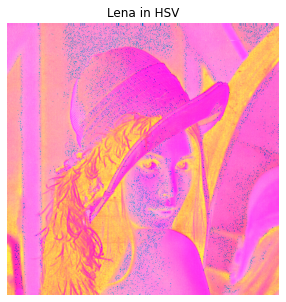

In [ ]:
hsv = cv2.merge((hue,sat,val))
plt.figure(figsize = (5,5)),plt.axis('off'),plt.title('Lena in HSV')
plt.imshow(hsv)

In [ ]:
print(hue.min(),hue.max(), sat.min(), sat.max(), val.min(),val.max())

0.0 359.58041958041963 0.01877934272300476 0.9646017699115044 0.23137254901960785 1.0
